In [ ]:
# All examples are from: 
# https://github.com/yunjey/pytorch-tutorial

In [1]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [13]:
w = torch.tensor([[0.3304]], requires_grad=True)
b = torch.tensor([0.4247], requires_grad=True)

x = torch.tensor([[1.0308]])
y = torch.tensor([[-0.5796]])

temp =torch.tensor([[1]])

y_pred = x.matmul(w.add(temp)).add(b)

print("pred: ", y_pred.data)

l = y.subtract(y_pred).pow(2).mean()

print("loss: ", l.data)

l.backward()

print ('dL/dw: ', w.grad.data)
print ('dL/db: ', b.grad.data)

pred:  tensor([[1.7961]])
loss:  tensor(5.6438)
dL/dw:  tensor([[4.8977]])
dL/db:  tensor([4.7514])


In [2]:
# ================================================================== #
#                     1. Basic autograd example 1                    #
# ================================================================== #

# Create tensors.
x = torch.tensor(15., requires_grad=True)
w = torch.tensor(10., requires_grad=True)
b = torch.tensor(900., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
# Computes the sum of gradients of given tensors with respect to graph leaves.
y.backward()

# Print out the gradients.
# Computes and returns the sum of gradients of outputs with respect to the inputs.
print(x.grad)    # x.grad = 2 = dy/dx = w
print(w.grad)    # w.grad = 1 = dy/dw = x
print(b.grad)    # b.grad = 1 = dy/db = 1

tensor(10.)
tensor(15.)
tensor(1.)


In [19]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(2, 2) # inputs
y = torch.randn(2, 2) # ouputs
print(x)
print(y)

# Build a fully connected layer.

# Applies a linear transformation to the incoming data: y= xA^T + b
linear = nn.Linear(2, 2) # input size = 3, output size = 2
print ('w: ', linear.weight) # initial values defined here: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
print ('b: ', linear.bias)

# Build loss function and optimizer.

# Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input xxx and target yyy.
criterion = nn.MSELoss() 
# Implements stochastic gradient descent (optionally with momentum).
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)
print ('pred: ', pred) # input shape(10,3), output shape (10,2)

# Compute loss.
loss = criterion(pred, y) # using formula from docs
print('loss: ', loss.item()) # cost

# Backward pass.
loss.backward() # run backward pass on output to compute gradients across linear layer

# Print out the gradients.
# calucated from backward pass
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
print("pred: ", pred)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

tensor([[-0.7837,  0.3945],
        [-0.1218,  0.6905]])
tensor([[-1.2883, -2.0291],
        [ 0.0665, -0.4150]])
w:  Parameter containing:
tensor([[-0.1367,  0.4447],
        [ 0.0321, -0.2277]], requires_grad=True)
b:  Parameter containing:
tensor([-0.6949, -0.1522], requires_grad=True)
pred:  tensor([[-0.4122, -0.2672],
        [-0.3711, -0.3134]], grad_fn=<AddmmBackward>)
loss:  1.0183411836624146
dL/dw:  tensor([[-0.3166,  0.0217],
        [-0.6966,  0.3827]])
dL/db:  tensor([0.2192, 0.9318])
pred:  tensor([[-0.4170, -0.2835],
        [-0.3739, -0.3262]], grad_fn=<AddmmBackward>)
loss after 1 step optimization:  1.0019701719284058


In [44]:
x = np.asarray([[-0.7837,  0.3945],
        [-0.1218,  0.6905]])
y = np.asarray([[-1.2883, -2.0291],
        [ 0.0665, -0.4150]])

A = np.asarray([[-0.1367,  0.4447],
        [ 0.0321, -0.2277]])
b = np.asarray([-0.6949, -0.1522])

y_pred = x@np.transpose(A)+b # matmal
print(y_pred)

loss = ((y-y_pred)**2).mean()
print(loss)

mat = (y-y_pred)**2  # element-wise
# mean = (mat[0,0] + mat[0,1] + mat[1,0] + mat[1,1])/4
mean = mat.sum()/4

print(mean)

[[-0.41233406 -0.26718442]
 [-0.37118459 -0.31333663]]
1.0183915200525115
1.0183915200525115


In [84]:
b = 6
x = torch.tensor([[1, 2.], [3., 6.]], requires_grad=True)

# y = x.matmul(x).sum()
y = x.sum()
print(y)

y.backward()

print(x.grad)

tensor(12., grad_fn=<SumBackward0>)
tensor([[1., 1.],
        [1., 1.]])


In [55]:
import torch

x = torch.eye(3, requires_grad=True)
y = torch.tensor([[2.0,0,-2.0]], requires_grad=True)
z = y.matmul(x).sum()
z.backward()

print(x.grad)  # dz/dx
print(y.grad)  # dz/dy

tensor([[ 2.,  0., -2.]], grad_fn=<MmBackward>)
tensor([[ 2.,  2.,  2.],
        [ 0.,  0.,  0.],
        [-2., -2., -2.]])
tensor([[1., 1., 1.]])


In [19]:
# ================================================================== #
#                     3. Loading data from numpy                     #
# ================================================================== #

# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

# just some conversions
print(x, y, z)

[[1 2]
 [3 4]] tensor([[1, 2],
        [3, 4]]) [[1 2]
 [3 4]]


In [20]:
# ================================================================== #
#                         4. Input pipeline                           #
# ================================================================== #

# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

1.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

5.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

9.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

13.5%IOPub me

In [21]:
# ================================================================== #
#                5. Input pipeline for custom dataset                 #
# ================================================================== #

# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [22]:
# ================================================================== #
#                        6. Pretrained model                         #
# ================================================================== #

# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/willmartin/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%
/Users/willmartin/miniforge3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([64, 100])


In [ ]:
# ================================================================== #
#                      7. Save and load the model                    #
# ================================================================== #

# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

Epoch [5/60], Loss: 11.8994
Epoch [10/60], Loss: 4.9264
Epoch [15/60], Loss: 2.1016
Epoch [20/60], Loss: 0.9571
Epoch [25/60], Loss: 0.4935
Epoch [30/60], Loss: 0.3057
Epoch [35/60], Loss: 0.2296
Epoch [40/60], Loss: 0.1987
Epoch [45/60], Loss: 0.1862
Epoch [50/60], Loss: 0.1811
Epoch [55/60], Loss: 0.1791
Epoch [60/60], Loss: 0.1782


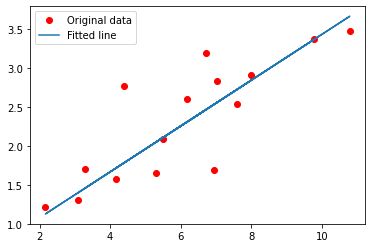

In [4]:
# linear regression ->  continuous values

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [6]:
# logistic regression -> classification

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 25
batch_size = 100
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/25], Step [100/600], Loss: 2.2115
Epoch [1/25], Step [200/600], Loss: 2.0691
Epoch [1/25], Step [300/600], Loss: 1.9880
Epoch [1/25], Step [400/600], Loss: 1.9090
Epoch [1/25], Step [500/600], Loss: 1.8426
Epoch [1/25], Step [600/600], Loss: 1.8276
Epoch [2/25], Step [100/600], Loss: 1.7279
Epoch [2/25], Step [200/600], Loss: 1.6645
Epoch [2/25], Step [300/600], Loss: 1.5318
Epoch [2/25], Step [400/600], Loss: 1.4984
Epoch [2/25], Step [500/600], Loss: 1.5609
Epoch [2/25], Step [600/600], Loss: 1.3909
Epoch [3/25], Step [100/600], Loss: 1.4090
Epoch [3/25], Step [200/600], Loss: 1.3445
Epoch [3/25], Step [300/600], Loss: 1.3562
Epoch [3/25], Step [400/600], Loss: 1.2851
Epoch [3/25], Step [500/600], Loss: 1.2856
Epoch [3/25], Step [600/600], Loss: 1.2732
Epoch [4/25], Step [100/600], Loss: 1.1928
Epoch [4/25], Step [200/600], Loss: 1.2317
Epoch [4/25], Step [300/600], Loss: 1.1752
Epoch [4/25], Step [400/600], Loss: 1.1073
Epoch [4/25], Step [500/600], Loss: 1.1063
Epoch [4/25

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/10], Step [100/600], Loss: 0.3254
Epoch [1/10], Step [200/600], Loss: 0.2177
Epoch [1/10], Step [300/600], Loss: 0.2197
Epoch [1/10], Step [400/600], Loss: 0.1206
Epoch [1/10], Step [500/600], Loss: 0.1867
Epoch [1/10], Step [600/600], Loss: 0.1071
Epoch [2/10], Step [100/600], Loss: 0.2689
Epoch [2/10], Step [200/600], Loss: 0.1360
Epoch [2/10], Step [300/600], Loss: 0.1419
Epoch [2/10], Step [400/600], Loss: 0.0594
Epoch [2/10], Step [500/600], Loss: 0.0816
Epoch [2/10], Step [600/600], Loss: 0.1443
Epoch [3/10], Step [100/600], Loss: 0.0324
Epoch [3/10], Step [200/600], Loss: 0.0768
Epoch [3/10], Step [300/600], Loss: 0.1642
Epoch [3/10], Step [400/600], Loss: 0.0456
Epoch [3/10], Step [500/600], Loss: 0.0232
Epoch [3/10], Step [600/600], Loss: 0.1513
Epoch [4/10], Step [100/600], Loss: 0.0125
Epoch [4/10], Step [200/600], Loss: 0.0782
Epoch [4/10], Step [300/600], Loss: 0.0173
Epoch [4/10], Step [400/600], Loss: 0.0515
Epoch [4/10], Step [500/600], Loss: 0.0676
Epoch [4/10

In [9]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

/Users/willmartin/miniforge3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/5], Step [100/600], Loss: 0.1019
Epoch [1/5], Step [200/600], Loss: 0.1496
Epoch [1/5], Step [300/600], Loss: 0.1169
Epoch [1/5], Step [400/600], Loss: 0.0505
Epoch [1/5], Step [500/600], Loss: 0.1541
Epoch [1/5], Step [600/600], Loss: 0.0389
Epoch [2/5], Step [100/600], Loss: 0.0131
Epoch [2/5], Step [200/600], Loss: 0.0161
Epoch [2/5], Step [300/600], Loss: 0.0392
Epoch [2/5], Step [400/600], Loss: 0.1538
Epoch [2/5], Step [500/600], Loss: 0.0746
Epoch [2/5], Step [600/600], Loss: 0.0678
Epoch [3/5], Step [100/600], Loss: 0.0638
Epoch [3/5], Step [200/600], Loss: 0.0124
Epoch [3/5], Step [300/600], Loss: 0.0537
Epoch [3/5], Step [400/600], Loss: 0.0197
Epoch [3/5], Step [500/600], Loss: 0.0625
Epoch [3/5], Step [600/600], Loss: 0.0482
Epoch [4/5], Step [100/600], Loss: 0.0298
Epoch [4/5], Step [200/600], Loss: 0.0190
Epoch [4/5], Step [300/600], Loss: 0.0483
Epoch [4/5], Step [400/600], Loss: 0.0207
Epoch [4/5], Step [500/600], Loss: 0.0838
Epoch [4/5], Step [600/600], Loss:

In [10]:
# ---------------------------------------------------------------------------- #
# An implementation of https://arxiv.org/pdf/1512.03385.pdf                    #
# See section 4.2 for the model architecture on CIFAR-10                       #
# Some part of the code was referenced from below                              #
# https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py   #
# ---------------------------------------------------------------------------- #

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 80
batch_size = 100
learning_rate = 0.001

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False, 
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
model = ResNet(ResidualBlock, [2, 2, 2]).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'resnet.ckpt')

0.0%

1.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

5.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

9.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

13.3%IOPub me

KeyboardInterrupt: 